In [1]:
from __future__ import print_function, unicode_literals, division, absolute_import
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import pandas as pd

In [2]:
import radiomics as pyrad
from radiomics.featureextractor import RadiomicsFeaturesExtractor

# Make Test Image and Mask
Here we make test images (a simple trianglular mask and a uniform progression)

In [3]:
test_mask_arr = np.stack(32*[np.eye(32)],0).astype(int)
test_img_arr = np.linspace(0,100, num = np.prod(test_mask_arr.shape)).reshape(test_mask_arr.shape)
test_mask = sitk.GetImageFromArray(test_mask_arr)
test_img = sitk.GetImageFromArray(test_img_arr)

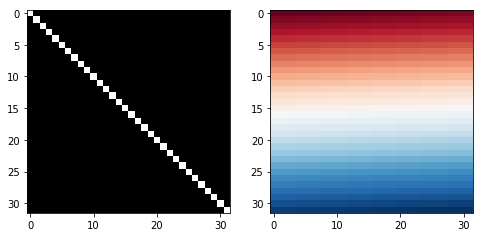

In [4]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(test_mask_arr[0], cmap = 'bone')
ax2.imshow(test_img_arr[0], cmap = 'RdBu')

# Extract simple stats
Here is just the simple statistics for testing

In [5]:
extractor = RadiomicsFeaturesExtractor( verbose = True)
extractor.disableAllFeatures()
extractor.enableFeaturesByName(firstorder = [])
out_dict = extractor.execute(test_img, test_mask)
pd.DataFrame([out_dict])

		Computing firstorder


,general_info_BoundingBox,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,general_info_InputImages,general_info_MaskHash,general_info_Version,general_info_VolumeNum,general_info_VoxelNum,original_firstorder_Uniformity,...,original_firstorder_Variance,original_firstorder_RootMeanSquared,original_firstorder_InterquartileRange,original_firstorder_MeanAbsoluteDeviation,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_Energy,original_firstorder_Skewness,original_firstorder_Maximum,original_firstorder_StandardDeviation,original_firstorder_TotalEnergy
0,(0; 0; 0; 32; 32; 32),{'padDistance': 5; 'verbose': True; 'interpola...,dd1063b4904affacbcfa769510e55d35690f6961,(1.0; 1.0; 1.0),{'Original': {}},1daf886d07071ceba6a23f52cdcb6460dc91c19a,v1.0.1.post6.dev0+g5b1e8bb,1,1024,0.25,...,833.435014,2050.203267,50.0,25.000763,19.97066,4.304213e+09,0.0,100.0,28.869275,4.304213e+09


# Run using everything
Here we run the extractor with everything, which causes a few issues but returns over 100 columns worth of radiomics features!

In [6]:
extractor = RadiomicsFeaturesExtractor(verbose = True)
extractor.enableAllFeatures()
out_dict = extractor.execute(test_img, test_mask)
pd.DataFrame([out_dict])

		Computing shape
		Computing firstorder


calculate GLCM: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 222.22it/s]


		Computing glcm


calculate GLSZM: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 48.78it/s]


		Computing glszm
		Computing glrlm


,general_info_BoundingBox,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,general_info_InputImages,general_info_MaskHash,general_info_Version,general_info_VolumeNum,general_info_VoxelNum,original_shape_Maximum2DDiameterColumn,...,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_RunVariance,original_glrlm_RunPercentage,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunEmphasis
0,(0; 0; 0; 32; 32; 32),{'padDistance': 5; 'verbose': True; 'interpola...,dd1063b4904affacbcfa769510e55d35690f6961,(1.0; 1.0; 1.0),{'Original': {}},1daf886d07071ceba6a23f52cdcb6460dc91c19a,v1.0.1.post6.dev0+g5b1e8bb,1,1024,31.0,...,7.497225,28.953289,2276.534562,296.399351,0.250258,0.016999,2.421762,0.113037,0.298798,0.044432


In [7]:

for c_name in extractor.getFeatureClassNames():
    print('Calculating {} features'.format(c_name))
    featureClass = extractor.featureClasses[c_name](test_img, test_mask)

Calculating firstorder features
Calculating glcm features
Calculating glszm features
Calculating shape features
Calculating glrlm features
